# Classification

In [1]:
# libraries/ settings
import datetime
import plotly.express as px
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
%matplotlib inline

## Deciding on the model:

On the first run I will do basic classification with multiple models on both 1. standardized/normalized values and 2. PCA ones separately to check classification scores. 

In [2]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# Normalized Xs

In [3]:
X = pd.read_pickle(os.path.join('data', 'X.pkl'))
y = X.kmeans_label.copy()
X.drop('kmeans_label', axis=1, inplace=True)

## Class Balances:  
Although the classes are not perfectly balanced, still the proportions are much better than a hugely imbalanced dataset and can be a reflection of a real world scenario, so I decided to keep them as it is. Further balancing or more data can greatly help the final classification model.

Proportion of each class:

0    0.363376
3    0.325031
1    0.175666
2    0.135928
Name: kmeans_label, dtype: float64


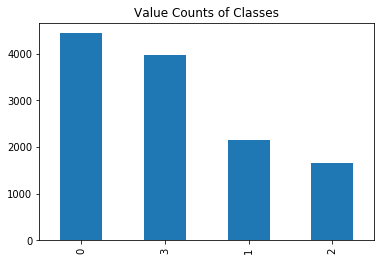

In [4]:
y.value_counts().plot(kind='bar', title='Value Counts of Classes')
print(f'Proportion of each class:\n\n{y.value_counts(normalize=True)}')

In [5]:
# stratify makes sure the proportions of classes are reserved during the random shuffling/sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

KNeighborsClassifier
****Results****
Weighted F1 Score: 91.8571%
Log Loss: 0.5937678739948834
SVC
****Results****
Weighted F1 Score: 95.9112%
Log Loss: 0.08547418704970212
NuSVC
****Results****
Weighted F1 Score: 95.3468%
Log Loss: 0.08455003979541575
DecisionTreeClassifier
****Results****
Weighted F1 Score: 93.3960%
Log Loss: 2.2813631105701395
RandomForestClassifier
****Results****
Weighted F1 Score: 95.1777%
Log Loss: 0.19035910292909272
AdaBoostClassifier
****Results****
Weighted F1 Score: 85.4019%
Log Loss: 0.7428252231238343
GradientBoostingClassifier
****Results****
Weighted F1 Score: 96.9797%
Log Loss: 0.09501377610740355
XGBClassifier
****Results****
Weighted F1 Score: 97.0816%
Log Loss: 0.08633257232304715
GaussianNB
****Results****
Weighted F1 Score: 81.5448%
Log Loss: 3.1503282819084473
LinearDiscriminantAnalysis
****Results****
Weighted F1 Score: 94.9790%
Log Loss: 0.26201481285559036
⌚Process took: 0:03:01.016524


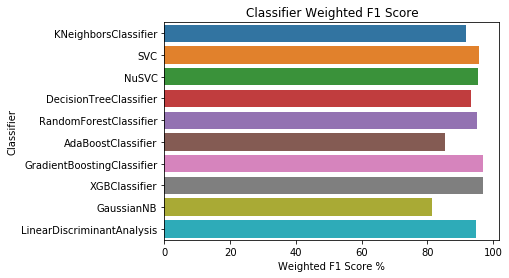

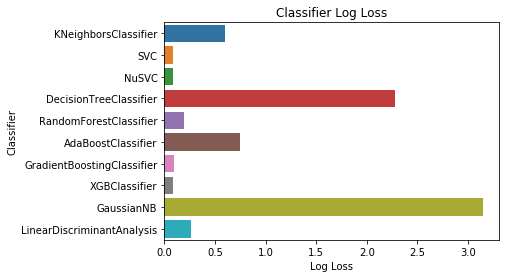

In [6]:
t1 = datetime.datetime.now()  # ⌚

# This is not my code found it a while back in a blog post, not sure who the credit goes to. did only minor adjustments.

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=1, probability=True,
        class_weight='balanced', random_state=42),
    NuSVC(nu=0.5, kernel='rbf', probability=True,
          class_weight='balanced', random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    XGBClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis()]

log_cols = ["Classifier", "Weighted F1 Score", "Log Loss"]

log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_val)
    acc = f1_score(y_val, train_predictions, average='weighted')
    print("Weighted F1 Score: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_val)
    ll = log_loss(y_val, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)  # sns.set_color_codes("muted")

t2 = datetime.datetime.now() - t1
print('⌚Process took:', t2)

sns.barplot(x='Weighted F1 Score', y='Classifier', data=log)
plt.xlabel('Weighted F1 Score %')
plt.title('Classifier Weighted F1 Score')
plt.show()
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

Based on the f1 score and logloss values: We have three highest performing models: **SVC**, **GradientBoostingClassifier**, and **XGBoost**: All scores are close to %96 and *loglosses* are close to 0.08. 

# PCA Xs

In [7]:
X_pca = pd.read_pickle(os.path.join('data', 'X_pca.pkl'))
y_pca = X_pca.kmeans_label.copy()
X_pca.drop('kmeans_label', axis=1, inplace=True)
# stratify makes sure the proportions of classes are reserved during the random shuffling/sampling
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca)
X_pca_train, X_pca_val, y_pca_train, y_pca_val = train_test_split(
    X_pca_train, y_pca_train, test_size=0.2, random_state=42, stratify=y_pca_train)

KNeighborsClassifier
****Results****
Weighted F1 Score: 91.3009%
Log Loss: 0.5453066449100686
SVC
****Results****
Weighted F1 Score: 96.8945%
Log Loss: 0.0603207959693647
NuSVC
****Results****
Weighted F1 Score: 95.9104%
Log Loss: 0.08305065000546409
DecisionTreeClassifier
****Results****
Weighted F1 Score: 96.3608%
Log Loss: 1.255633960081241
RandomForestClassifier
****Results****
Weighted F1 Score: 96.9308%
Log Loss: 0.15637239198687722
AdaBoostClassifier
****Results****
Weighted F1 Score: 91.6975%
Log Loss: 0.5887080571208457
GradientBoostingClassifier
****Results****
Weighted F1 Score: 98.3627%
Log Loss: 0.04878190637564746
XGBClassifier
****Results****
Weighted F1 Score: 98.4660%
Log Loss: 0.040575784796117426
GaussianNB
****Results****
Weighted F1 Score: 89.4943%
Log Loss: 0.7148061091748334
LinearDiscriminantAnalysis
****Results****
Weighted F1 Score: 95.1372%
Log Loss: 0.16707816910388845
⌚Process took: 0:02:04.625186


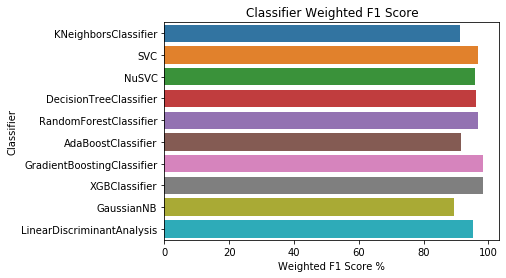

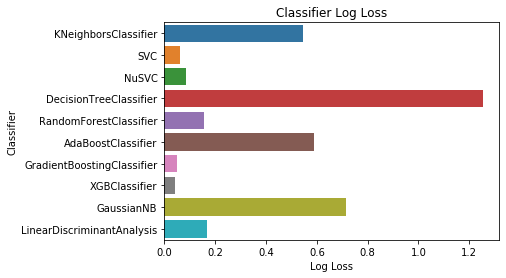

In [8]:
t1 = datetime.datetime.now()  # ⌚

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf", C=1, probability=True,
        class_weight='balanced', random_state=42),
    NuSVC(nu=0.5, kernel='rbf', probability=True,
          class_weight='balanced', random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    XGBClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis()]

log_cols = ["Classifier", "Weighted F1 Score", "Log Loss"]

log = pd.DataFrame(columns=log_cols)
for clf in classifiers:
    clf.fit(X_pca_train, y_pca_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict(X_pca_val)
    acc = f1_score(y_val, train_predictions, average='weighted')
    print("Weighted F1 Score: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_pca_val)
    ll = log_loss(y_pca_val, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)  # sns.set_color_codes("muted")

t2 = datetime.datetime.now() - t1
print('⌚Process took:', t2)

sns.barplot(x='Weighted F1 Score', y='Classifier', data=log)
plt.xlabel('Weighted F1 Score %')
plt.title('Classifier Weighted F1 Score')
plt.show()
sns.barplot(x='Log Loss', y='Classifier', data=log)
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Results Comparison

Result comparison:

In almost all of the cases, the PCA seems to do a better job of reducing the logloss, and improving the f1 score by a few percent. 
- Decision Tree goes from 93% to 96%  
- Ada Boost gets 6% increase  
- GBC goes from 96% to 98% with the lowest logloss among all models  
- XGB improves one more percent from 97 to 98. 
- GaussianNB gets a 8% increase in accuracy and great reduction in logloss 


Performance of the PCA version is also much better and seems to be twice as much.

Since PCA leads to less interpretation on feature importance, I decided to use the normal standardized values over the PCA ones.

Among the models [there is no silver bullet](https://machinelearningmastery.com/start-with-gradient-boosting/). **XGB** seems to be performing really well with the lowest logloss value. So further work is done on classifying the model with XGB and a gridsearch optimization. 


# XGBoost

In [9]:
# 🍻 cheers to yellowbricks
from yellowbrick.classifier import classification_report, confusion_matrix

In [10]:
xgb = XGBClassifier(eta=0.1, n_estimators=500, booster='gbtree',
                    gamma=0, max_depth=12, subsample=0.33,  verbosity=1, n_jobs=-1,
                    early_stopping=5, random_state=42).fit(X_train, y_train,
                                                           eval_set=[
                                                               (X_train, y_train), (X_val, y_val)],
                                                           eval_metric=['merror', 'mlogloss'], verbose=True)

lidation_0-merror:0.00000	validation_0-mlogloss:0.00340	validation_1-merror:0.02253	validation_1-mlogloss:0.06260
[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.00339	validation_1-merror:0.02202	validation_1-mlogloss:0.06246
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.00338	validation_1-merror:0.02253	validation_1-mlogloss:0.06242
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.00337	validation_1-merror:0.02253	validation_1-mlogloss:0.06240
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.00336	validation_1-merror:0.02253	validation_1-mlogloss:0.06239
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.00336	validation_1-merror:0.02253	validation_1-mlogloss:0.06250
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.00335	validation_1-merror:0.02253	validation_1-mlogloss:0.06256
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.00334	validation_1-merror:0.02253	validation_1-mlogloss:0.06258
[344]	validation_0-merror:0.0000

# Validation Set Evaluation

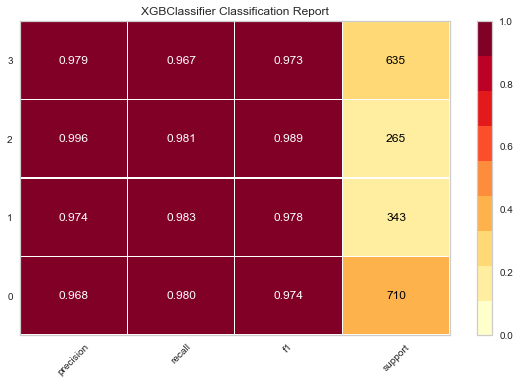

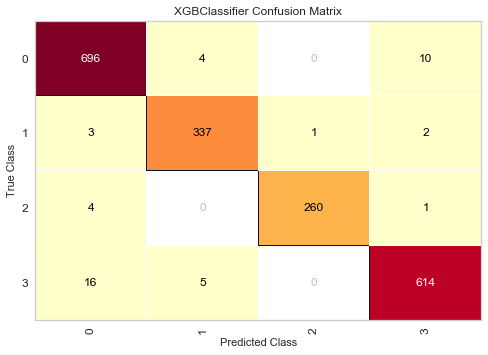

In [11]:
classification_report(xgb, X_train, y_train, X_val, y_val, support=True)
confusion_matrix(xgb, X_train, y_train, X_val, y_val)

The classification report in all values looks very promising. As seen by the scores, class 2 has the perfect score among all classes, class 0 has the lowest one. Yet all values are really good and in the range of 96-99%.

## Interpretation of the Confusion Matrix  

According to the confusion matrix of the base model:  
from cluster/class **0**:  4 values is misclassified as 1s and 10 as 3s.  
from cluster/class **1**:  3 values is misclassified as 0s, 1 as 2s, 2 as 3s.  
from cluster/class **2**:  4 values is misclassified as 0s, 1 as 3s.  
from cluster/class **3**: 16 values is misclassified as 0s, 5 as 1s.  

cluster 0 and 3 have the highest number of mislabeled predictions, this can also be expected since they had higher number of records: each close to 33% in the initial dataset.



# Testing Set Evaluation

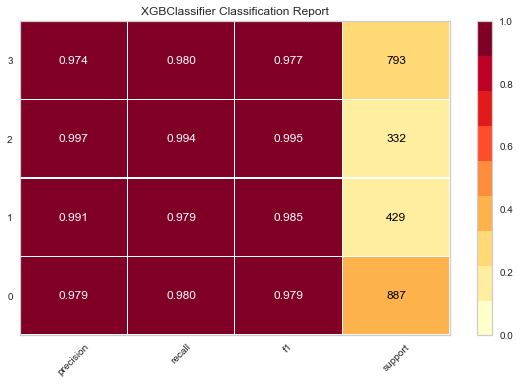

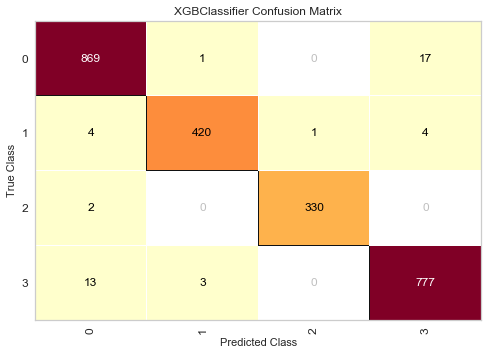

In [12]:
classification_report(xgb, X_train, y_train, X_test, y_test, support=True)
confusion_matrix(xgb, X_train, y_train, X_test, y_test)

## Interpretation of the Confusion Matrix  

According to the confusion matrix of the base model:  
from cluster/class **0**:  1 values is misclassified as 1s and 17 as 3s.  
from cluster/class **1**:  4 values is misclassified as 0s, 1 as 2s, 4 as 3s.  
from cluster/class **2**:  2 values is misclassified as 0s.  
from cluster/class **3**: 13 values is misclassified as 0s, 3 as 1s.  

Overall, results look very similar to the validation data set, which is good. 

I wouldn't do further hyper parameter tuning for this model through a gridsearch method, yet we can do that as well as a validationcurve for each hyperparameter from yellowbrick. 



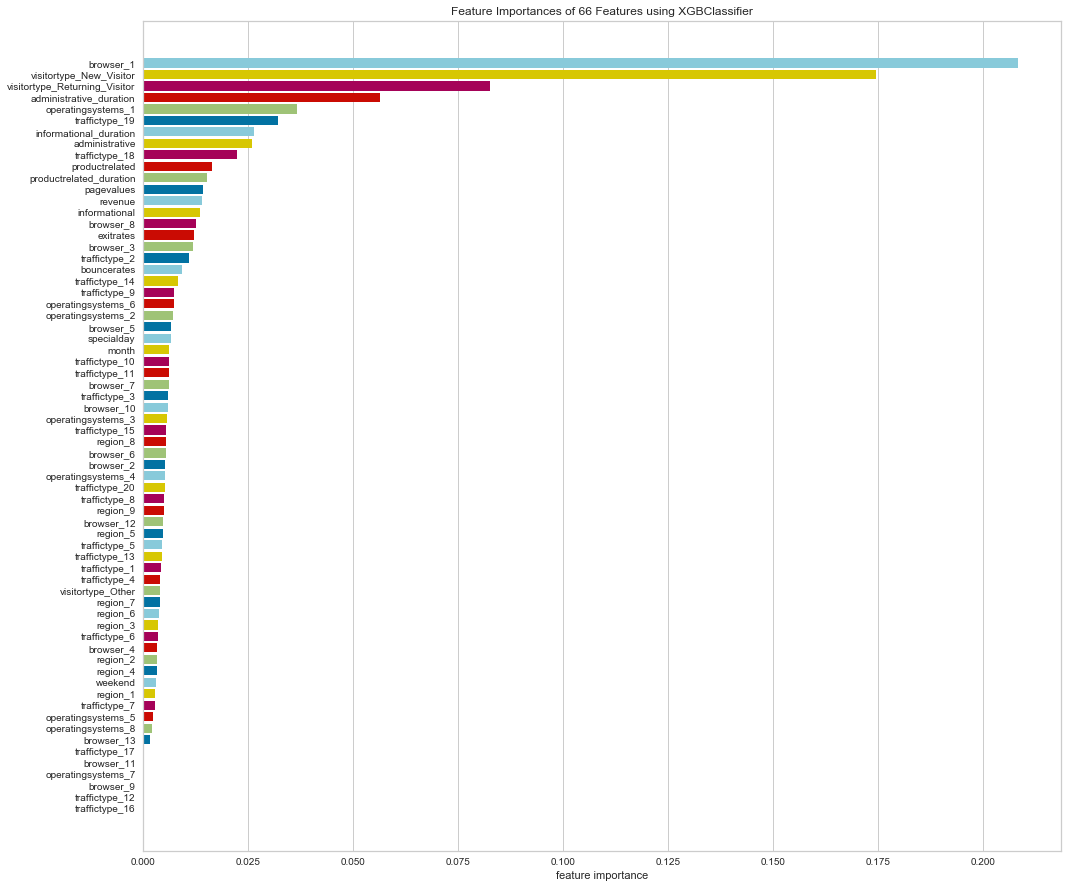

In [13]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(xgb, relative=False, size=(1080, 900))
viz.fit(X_test, y_test)
viz.show()

Based on the feature importance, we can see the top 5 features are:  
1. browsertype: browser_1  
2. visitortype: New Visitors  
3. visitortype: Returning Visitors  
4. administrative_duration  
5. operating_system_1  

In [14]:
print('Final mean accuracy score for the model:', xgb.score(X_test, y_test))

Final mean accuracy score for the model: 0.9815649324047522


# Save Model

In [15]:
import pickle
if os.path.exists('model'):
    pass
else:
    os.mkdir('model')

pickle.dump(xgb, open(os.path.join('model', "osh.pkl"), "wb"))

In [16]:
# load model
# xgb_loaded = pickle.load(open(os.path.join('model', "osh.pkl"), "rb"))